In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Procurando números primos

## Criando Dataset

In [59]:
df_primos = pd.read_csv("dataset-primos.csv")

In [60]:
df_primos = df_primos.sort_values(by="NumThreads")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-primos.csv"
df_primos.to_csv(output_file, index=False)

## Questão 1

### a)

In [61]:
# Ordenar os dados pelo número de threads
uso_cpu = df_primos.sort_values(by="MeanUtilization", ascending=True)

# Exibir apenas as colunas desejadas
uso_cpu = uso_cpu[["NumThreads", "MeanUtilization"]]
display(uso_cpu)

,NumThreads,MeanUtilization
0,2,0.253655
1,4,0.507399
2,6,0.751138
4,10,0.979317
5,12,0.985529
9,20,0.987724
6,14,0.991642
7,16,0.992555
8,18,0.993064
3,8,0.993400


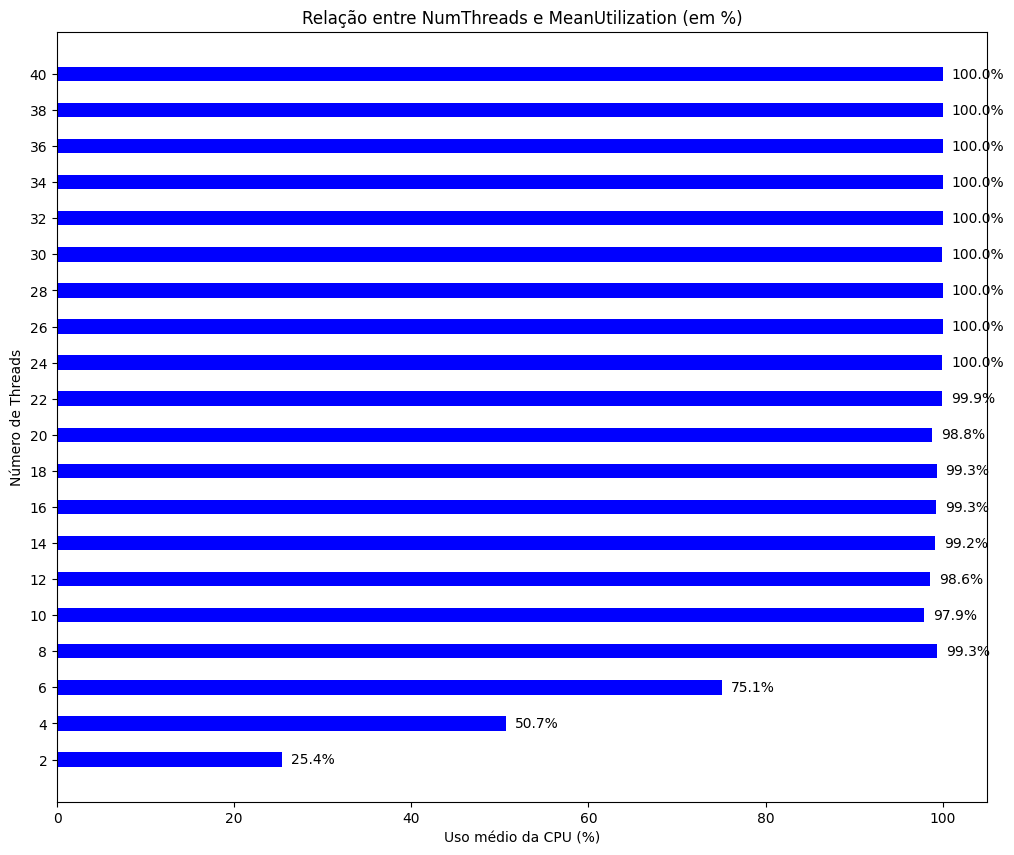

In [62]:
import matplotlib.pyplot as plt

# Convertendo valores para porcentagem
df_primos["MeanUtilizationPercent"] = df_primos["MeanUtilization"] * 100

# Gráfico de barras horizontais
plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos["NumThreads"], df_primos["MeanUtilizationPercent"], color='b')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width():.1f}%',  # Valor formatado como porcentagem
        va='center'
    )

num_threads = df_primos["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

# Configurações do gráfico
plt.title("Relação entre NumThreads e MeanUtilization (em %)")
plt.xlabel("Uso médio da CPU (%)")
plt.ylabel("Número de Threads")
plt.show()


# Fazendo acessos à memória

## Criando dataset

In [63]:
df_memoria = pd.read_csv("dataset-memoria.csv")

In [64]:
df_memoria = df_memoria.sort_values(by="KBinMemory")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-memoria.csv"
df_memoria.to_csv(output_file, index=False)

## Questão 1

In [65]:
tempo_busca = df_memoria.sort_values(by="SearchTime",ascending=True)
tempo_busca = tempo_busca[["KBinMemory","SearchTime"]]


tempo_busca

,KBinMemory,SearchTime
0,1024,1776
1,10240,4103
2,20480,4968
3,30720,5316
5,51200,5456
4,40960,5594
6,61440,5630
7,71680,5692
8,81920,5725
9,92160,5741


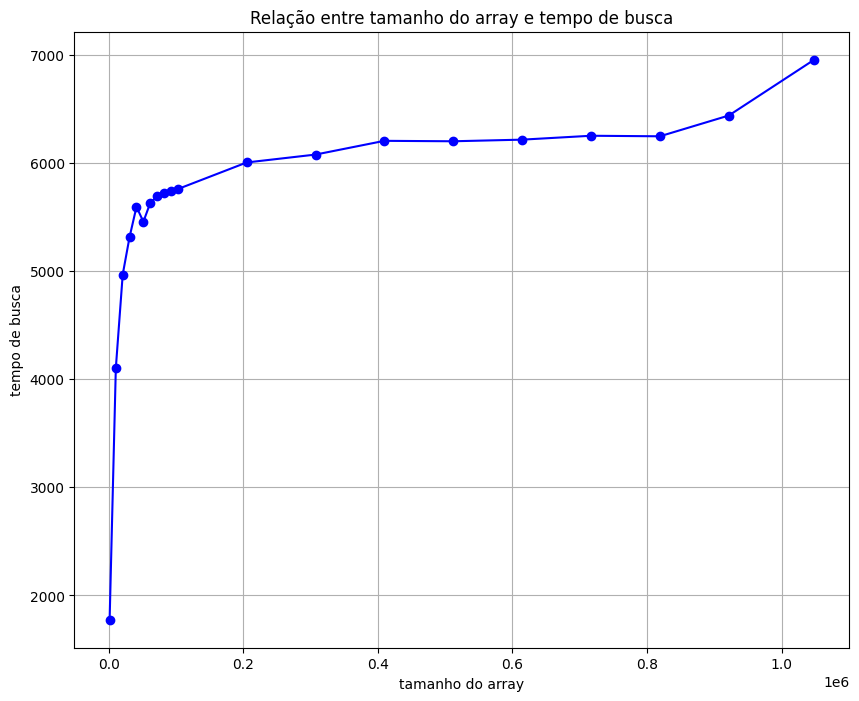

In [66]:
plt.figure(figsize=(10, 8))
plt.plot(df_memoria["KBinMemory"], df_memoria["SearchTime"], marker='o', linestyle='-', color='b')

plt.title("Relação entre tamanho do array e tempo de busca")
plt.xlabel("tamanho do array")
plt.ylabel("tempo de busca")
plt.grid()
plt.show()